In [1]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [2]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)


In [3]:
def heat_kernel(x, y, gamma, d):
    return ((2*np.pi)**(-d/2))*(gamma**(-d))*np.exp((-(x-y)**2)/(2*gamma**2))

In [4]:
N = 1000
grid = np.arange(1/N,1,1/N)#datagrid


In [5]:
N = 999
matrix = np.zeros((N, N))

for i in range(0,N):
    for j in range(0,N):
        if i < j:
            matrix[i,j] = grid[i]
        else:
            matrix[i,j] = grid[j]
        

In [16]:
values = np.arange(0.002,0.1,0.002)
error = []
for gamma in values:
    #calculation of the right hand side of the normal equation
    n = 100
    grid_ = np.arange(0.001,1,1/n)#recongrid
    norm_dat = np.zeros((N,n))
    for j in range(0,n):#size of the recon_grid
        tmp = np.zeros((N))
        for i in range(0,N):
            #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
            tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
            #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
        norm_dat[:,j] = tmp
    #####
    theta = 0.001
    recon_kernel_grid = np.zeros((N,n))
    recon_kernel_grid = np.linalg.solve(matrix, norm_dat)
    #recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)
    #####
    epsilon = (np.random.rand(1,N)-0.5)
    ###
    data = []
    for i in range(0,N):
        data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
    data = np.array(data)
    epsilon = np.reshape(epsilon, (N))
    epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(data)*0.00
    g = data+epsilon
    g = np.reshape(g, (N,1))
    solution_grid = np.transpose(g)@recon_kernel_grid
    solution_grid = np.reshape(solution_grid, (n))
    true_function = []
    for val in grid_:
        true_function.append(f(val))
    error.append(np.linalg.norm(np.array(true_function)-solution_grid))



In [17]:
values_ = np.arange(0.002,0.12,0.002)
error_ = []
for gamma in values_:
    #calculation of the right hand side of the normal equation
    n = 100
    grid_ = np.arange(0.001,1,1/n)#recongrid
    norm_dat = np.zeros((N,n))
    for j in range(0,n):#size of the recon_grid
        tmp = np.zeros((N))
        for i in range(0,N):
            #tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]#
            tmp[i] = integrate.fixed_quad(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), 70)[0]
            #tmp[i] = integrate.quadrature(heat_kernel, 0, grid[i], (grid_[j], gamma, 1), tol=0.02, maxiter=70)[0]
        norm_dat[:,j] = tmp
    #####
    theta = 0.001
    recon_kernel_grid = np.zeros((N,n))
    recon_kernel_grid = np.linalg.solve(matrix, norm_dat)
    #recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)
    #####
    epsilon = (np.random.rand(1,N)-0.5)
    ###
    data = []
    for i in range(0,N):
        data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
    data = np.array(data)
    epsilon = np.reshape(epsilon, (N))
    epsilon = (epsilon/np.linalg.norm(epsilon))*np.linalg.norm(data)*0.05
    g = data+epsilon
    g = np.reshape(g, (N,1))
    
    solution_grid = np.transpose(g)@recon_kernel_grid
    solution_grid = np.reshape(solution_grid, (n))
    true_function = []
    for val in grid_:
        true_function.append(f(val))
    error_.append(np.linalg.norm(np.array(true_function)-solution_grid))


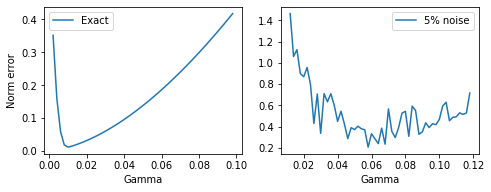

In [20]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(7.5, 3))
fig.subplots_adjust(bottom=0.2,right=0.93)
axs[0].plot(values[0::], error[0::], label='Exact')

axs[1].plot(values_[5::], error_[5::], label='5% noise')


axs[0].set_xlabel('Gamma')
axs[0].set_ylabel('Norm error')
axs[1].set_xlabel('Gamma')

axs[0].legend()
axs[1].legend()
#fig.legend()
plt.savefig('gamma_optim_', format='pdf')